In [22]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib . pyplot as plt
import seaborn as sns

Bài tập 1: (Data Analysis) hãy hoàn thiện chương trình sau sử dụng thư viện seaborn để hiện thị mối quan hệ giữa độ tuổi và khả năng bị bệnh tim. Ở đây, target = 1 ngụ ý rằng người đó đang bị bệnh tim và target = 0 ngụ ý rằng người đó không bị bệnh tim.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


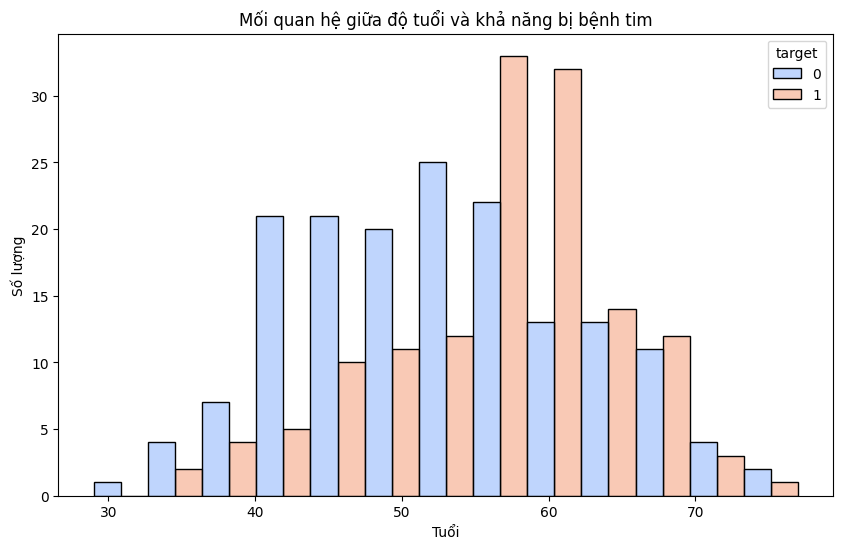

In [23]:
# Tải dữ liệu từ file CSV
df = pd.read_csv('cleveland.csv', header=None)

# Đặt tên cho các cột dữ liệu
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Gán giá trị 0 cho target là không bị bệnh tim, các giá trị từ 1-4 là có bệnh tim
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Điền giá trị thiếu cho các cột thal và ca
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Vẽ biểu đồ hiển thị mối quan hệ giữa độ tuổi và khả năng bị bệnh tim
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='dodge', palette='coolwarm')
plt.title('Mối quan hệ giữa độ tuổi và khả năng bị bệnh tim')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.show()

Bài tập 2: (Data Analysis) hãy hoàn thiện chương trình sau sử dụng thư viện seaborn để hiện thị mối quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim.

<ipython-input-25-8f3c8291729b>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sex', y='age', hue='target', ci=None, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


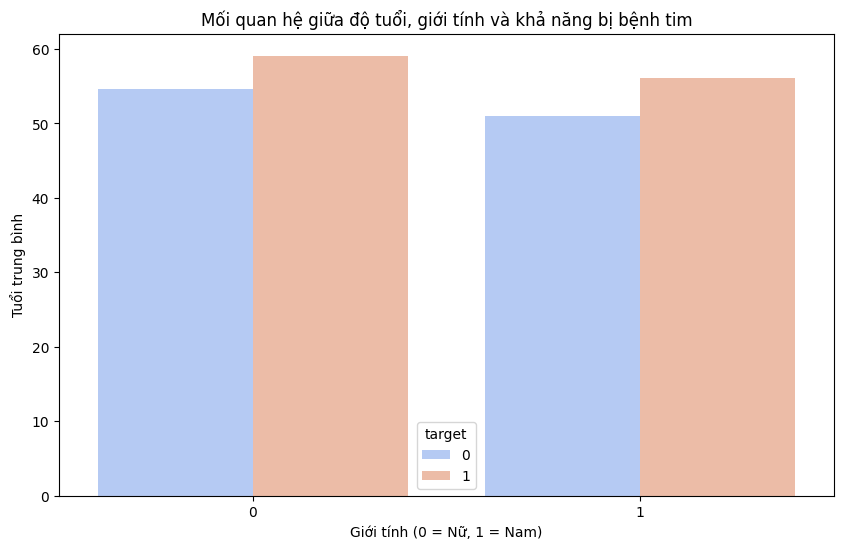

In [25]:
# Tải dữ liệu từ file CSV
df = pd.read_csv('cleveland.csv', header=None)

# Đặt tên cho các cột dữ liệu
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Gán giá trị 0 cho target là không bị bệnh tim, các giá trị từ 1-4 là có bệnh tim
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Điền giá trị thiếu cho các cột thal và ca
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Tạo biểu đồ thanh hiển thị mối quan hệ giữa tuổi, giới tính và khả năng bị bệnh tim
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='sex', y='age', hue='target', ci=None, palette='coolwarm')

# Đặt tiêu đề và nhãn
plt.title('Mối quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim')
plt.xlabel('Giới tính (0 = Nữ, 1 = Nam)')
plt.ylabel('Tuổi trung bình')
plt.show()

Bài tập 3: (sử dụng KNN cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật KNN để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’

In [26]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn bị dữ liệu X (đặc trưng) và y (nhãn)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Huấn luyện mô hình
knn.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Tính ma trận nhầm lẫn cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


Bài tập 4: (sử dụng SVM cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật SVM để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: kernel = ’rbf’,
random_state=42


In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lấy dữ liệu X (tất cả các cột ngoại trừ cột cuối cùng) và y (cột cuối cùng)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split

# Chia lại dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình SVM với kernel='rbf' và random_state=42
svm = SVC(kernel='rbf', random_state=42)

# Huấn luyện mô hình
svm.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Tính ma trận nhầm lẫn cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
print()

# Tính độ chính xác cho tập huấn luyện
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)

# Tính độ chính xác cho tập kiểm tra
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác cho tập huấn luyện
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))

# In kết quả độ chính xác cho tập kiểm tra
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


Bài tập 5: (sử dụng Naive Bayes cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Naive Bayes để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: kernel = ’rbf’, random_state=42


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Lấy dữ liệu X (tất cả các cột ngoại trừ cột cuối cùng) và y (cột cuối cùng)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Xử lý các giá trị NaN bằng SimpleImputer, thay thế bằng giá trị trung bình
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Naive Bayes
naive_bayes = GaussianNB()

# Huấn luyện mô hình
naive_bayes.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = naive_bayes.predict(X_train)
y_test_pred = naive_bayes.predict(X_test)

# Tính ma trận nhầm lẫn cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác cho tập huấn luyện
print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))

# In kết quả độ chính xác cho tập kiểm tra
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))


Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


Bài tập 6: (sử dụng Decision Tree cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Decision Tree để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: criterion=’gini’, max_depth=10, min_samples_split=2

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Lấy dữ liệu X (tất cả các cột ngoại trừ cột cuối cùng) và y (cột cuối cùng)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Xử lý các giá trị NaN bằng SimpleImputer, thay thế bằng giá trị trung bình
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Decision Tree với criterion='gini', max_depth=10, min_samples_split=2
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)

# Huấn luyện mô hình
decision_tree.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Tính ma trận nhầm lẫn cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác cho tập huấn luyện
print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train))

# In kết quả độ chính xác cho tập kiểm tra
print('Accuracy for test set for Decision Tree = {}'.format(accuracy_for_test))



Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


Bài tập 7: (sử dụng Random Forest cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Random Forest để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: criterion=’gini’, max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Lấy dữ liệu X (tất cả các cột ngoại trừ cột cuối cùng) và y (cột cuối cùng)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Xử lý các giá trị NaN bằng SimpleImputer, thay thế bằng giá trị trung bình
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Random Forest với các tham số
random_forest = RandomForestClassifier(criterion='gini', max_depth=10,
                                       min_samples_split=2, n_estimators=10, random_state=42)

# Huấn luyện mô hình
random_forest.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

# Tính ma trận nhầm lẫn cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác cho tập huấn luyện
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))

# In kết quả độ chính xác cho tập kiểm tra
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))


Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


Bài tập 8: (sử dụng Adaboost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Adaboost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau:n_estimators=50, learning_rate=1.0

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Lấy dữ liệu X (tất cả các cột ngoại trừ cột cuối cùng) và y (cột cuối cùng)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Xử lý các giá trị NaN bằng SimpleImputer, thay thế bằng giá trị trung bình
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình AdaBoost với n_estimators=50 và learning_rate=1.0
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Huấn luyện mô hình
adaboost.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = adaboost.predict(X_train)
y_test_pred = adaboost.predict(X_test)

# Tính ma trận nhầm lẫn cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác cho tập huấn luyện
print('Accuracy for training set for Adaboost = {}'.format(accuracy_for_train))

# In kết quả độ chính xác cho tập kiểm tra
print('Accuracy for test set for Adaboost = {}'.format(accuracy_for_test))


Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Bài tập 9: (sử dụng GradientBoost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật GradientBoost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: learning_rate=0.1, n_estimators=100, subsample=1.0,
min_samples_split=2, max_depth=3, random_state=42


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Lấy dữ liệu X (tất cả các cột ngoại trừ cột cuối cùng) và y (cột cuối cùng)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Xử lý các giá trị NaN bằng SimpleImputer, thay thế bằng giá trị trung bình
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Gradient Boosting với các tham số đã cho
gradient_boosting = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,
                                               subsample=1.0, min_samples_split=2,
                                               max_depth=3, random_state=42)

# Huấn luyện mô hình
gradient_boosting.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = gradient_boosting.predict(X_train)
y_test_pred = gradient_boosting.predict(X_test)

# Tính ma trận nhầm lẫn cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác cho tập huấn luyện và kiểm tra
print('Accuracy for training set for GradientBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoost = {}'.format(accuracy_for_test))

Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


Bài tập 10: (sử dụng XGboost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật XGboost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: objective="binary:logistic", random_state=42, n_estimators = 100

In [56]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Lấy dữ liệu X (tất cả các cột ngoại trừ cột cuối cùng) và y (cột cuối cùng)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình XGBoost
xg = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
xg.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = xg.predict(X_test)

# Tính ma trận nhầm lẫn cho tập kiểm tra
cm_test = confusion_matrix(y_test, y_pred)

# Dự đoán trên tập huấn luyện
y_pred_train = xg.predict(X_train)

# Tính ma trận nhầm lẫn cho tập huấn luyện
cm_train = confusion_matrix(y_train, y_pred_train)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác cho tập huấn luyện và kiểm tra
print('Accuracy for training set for XGBClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for XGBClassifier = 1.0
Accuracy for test set for XGBClassifier = 0.84


Bài tập 11: (sử dụng kỷ thuật Stacking cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng kỹ thuật Stacking để dự đoán bệnh nhân có khả bị bệnh tim hay bằng cách dùng phương pháp stacking sử dụng heterogeneous approach với mô hình giải thuật được thể hiện ở hình 1.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Lấy dữ liệu X (tất cả các cột ngoại trừ cột cuối cùng) và y (cột cuối cùng)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Xử lý các giá trị NaN bằng SimpleImputer, thay thế bằng giá trị trung bình
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo các mô hình học cơ sở
dtc =  DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn =  KNeighborsClassifier()
xgb = XGBClassifier(XGBClassifier)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel = 'rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

# Danh sách các mô hình cơ sở cho Stacking
clf = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('gc', gc), ('ad', ad), ('svc', svc)]

# Khởi tạo mô hình final estimator là Logistic Regression
meta_learner = LogisticRegression()

# Khởi tạo StackingClassifier với các mô hình học cơ sở và Logistic Regression làm meta learner
classifier = StackingClassifier( estimators = clf,final_estimator = xg)

# Huấn luyện mô hình Stacking
classifier.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = classifier.predict(X_test)

# Tính ma trận nhầm lẫn cho tập kiểm tra
cm_test = confusion_matrix(y_test, y_pred)

# Dự đoán trên tập huấn luyện
y_pred_train = classifier.predict(X_train)

# Tính ma trận nhầm lẫn cho tập huấn luyện
cm_train = confusion_matrix(y_train, y_pred_train)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác cho tập huấn luyện và kiểm tra
print('Accuracy for training set for StackingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for StackingClassifier = {}'.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:723: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (th

Accuracy for training set for StackingClassifier = 0.92
Accuracy for test set for StackingClassifier = 0.9
